# Travel Package Purchase Prediction

## Objective: 
- predict which customers will buy a travel package 


In [146]:
### import all packages 

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
## import data 

data = pd.read_excel("Tourism.xlsx", sheet_name = "Tourism")

In [3]:
### lets take an quick look at the data

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.shape

(4888, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [9]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


#### EDA insights:
1. there are 4800 unique entries
2. the average person asked was 37 years old and listened to a 15 minute pitch 
3. the average person had almost 4 followups 
4. very few people had their own car 

#### Data Preprocessing 

In [10]:
## clean up Prod Taken

data["ProdTaken"].value_counts()

## there are no missing values, and the data is binary, so this column is ok 

0    3968
1     920
Name: ProdTaken, dtype: int64

In [11]:
## clean up Age 

data["Age"].value_counts()
## replace na values with mean 
data["Age"].fillna(value = data["Age"].mean(), inplace = True)

In [12]:
## clean up TypeofContact

data["TypeofContact"].value_counts()

##remove na values
data.dropna(subset = ["TypeofContact"], inplace = True)

In [13]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch             226
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               208
dtype: int64

In [14]:
## clean up CityTier

data["CityTier"].value_counts()

## there are no missing values

1    3173
3    1492
2     198
Name: CityTier, dtype: int64

In [15]:
## clean up DurationOfPitch

data["DurationOfPitch"].value_counts()

## replace na values with mean 
data["DurationOfPitch"].fillna(value = data["DurationOfPitch"].mean(), inplace = True)

In [16]:
## clean up Occupation 

data["Occupation"].value_counts()

## there are no missing values

Salaried          2363
Small Business    2064
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

In [17]:
## clean up Gender 

data["Gender"].value_counts()
## there are 3 genders, but the Fe Male and Female genders can be combined
data["Gender"].replace("Fe Male", "Female", inplace =True)

## there are no missing values, and the data is binary, so this column is ok 

In [18]:
## clean up NumberOfPersonVisiting 

data["NumberOfPersonVisiting"].value_counts()
## there are no missing values, so this column is ok 

3    2394
2    1401
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

In [19]:
## clean up NumberOfFollowups 

data["NumberOfFollowups"].value_counts()

## replace na values with the mean 
## however, the mean is 3.71, which is not possible in reality (since you cannot do 3.71 followups), 
##so the missing values were replaced with 3

data["NumberOfFollowups"].fillna(value = 3, inplace = True)

In [20]:
## clean up ProductPitched 

data["ProductPitched"].value_counts()


## there are no missing values

Basic           1832
Deluxe          1717
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [21]:
## clean up PreferredPropertyStar 

data["PreferredPropertyStar"].value_counts()

## missing values
## however, the mean is 3.58, which is not possible in reality (since you cannot give 3.58 stars), 
##so the missing values were replaced with 3

data["PreferredPropertyStar"].fillna(value = 3, inplace = True)

In [22]:
## clean up MaritalStatus 

data["MaritalStatus"].value_counts()
## there are no missing values

Married      2325
Divorced      944
Single        912
Unmarried     682
Name: MaritalStatus, dtype: int64

In [23]:
## clean up NumberOfTrips 

data["NumberOfTrips"].value_counts()

## missing values
## however, the mean is 3.323, which is not possible in reality (since you cannot have 3.323 trips), 
##so the missing values were replaced with 3
data["NumberOfTrips"].fillna(value = 3, inplace = True)

In [24]:
## clean up Passport 

data["Passport"].value_counts()

## no missing values

0    3441
1    1422
Name: Passport, dtype: int64

In [25]:
## clean up PitchSatisfactionScore 

data["PitchSatisfactionScore"].value_counts()

## no missing values

3    1466
5     967
1     937
4     910
2     583
Name: PitchSatisfactionScore, dtype: int64

In [26]:
## clean up OwnCar 

data["OwnCar"].value_counts()

## no missing values

1    3018
0    1845
Name: OwnCar, dtype: int64

In [27]:
## clean up NumberOfChildrenVisiting 

data["NumberOfChildrenVisiting"].value_counts()

## missing values
## the mean is 1.18, which is not possible in reality (since you cannot have 1.18 children), 
##so the missing values were replaced with 1

data["NumberOfChildrenVisiting"].fillna(value = 1, inplace = True)

In [28]:
## clean up Designation 

data["Designation"].value_counts()

## no missing values

Executive         1832
Manager           1717
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [29]:
## clean up MonthlyIncome 

data["MonthlyIncome"].value_counts()

## missing values
data["MonthlyIncome"].fillna(value = data["MonthlyIncome"].mean(), inplace = True)

#### Univariate Analyses

['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']


<Figure size 1080x360 with 0 Axes>

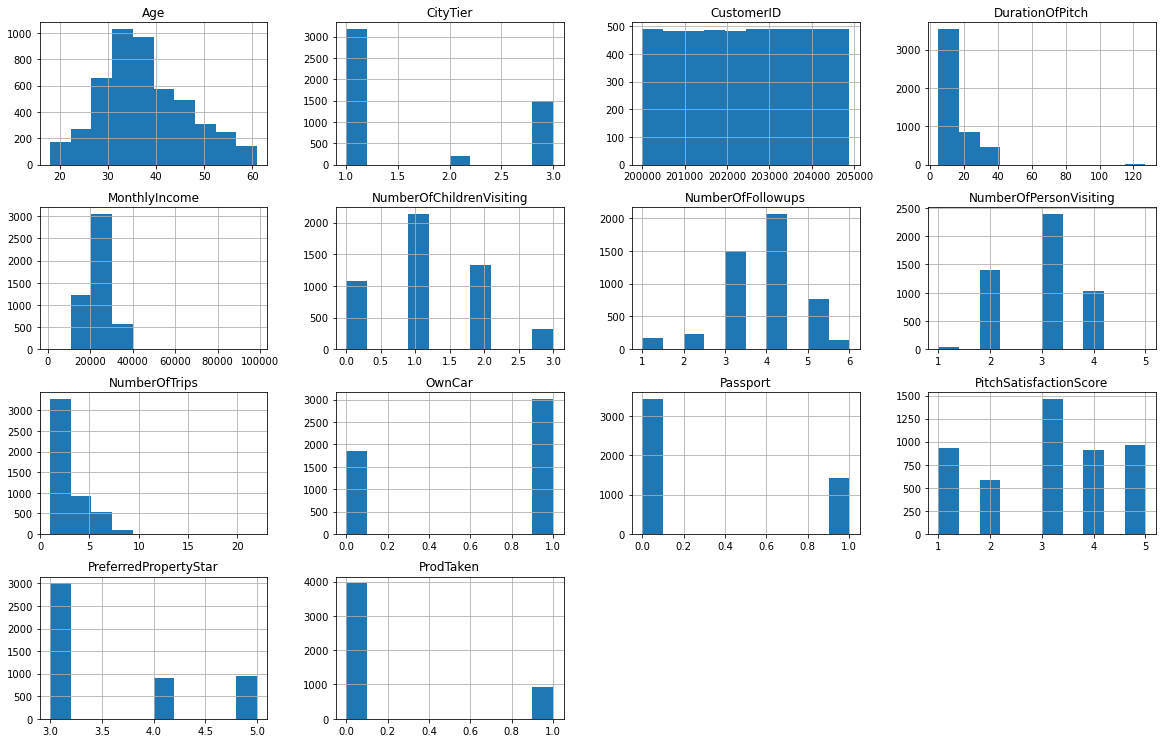

In [30]:
plt.figure(figsize=(15,5))
cols = list(data)

print (cols)
data[cols].hist(stacked=False, bins=10, figsize=(20,40), layout=(12,4)); 

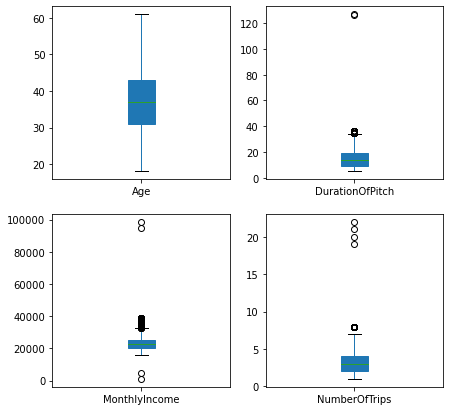

In [31]:
##lets look at the variables with non binned data (not ordinal)

fig, axes = plt.subplots(2, 2, figsize=(7, 7))

data.boxplot(column = "Age", ax =axes[0,0], grid =False, patch_artist=True)
data.boxplot(column = "DurationOfPitch",ax =axes[0,1], grid =False, patch_artist=True)
data.boxplot(column = "MonthlyIncome",ax =axes[1,0], grid =False, patch_artist=True)
data.boxplot(column = "NumberOfTrips",ax =axes[1,1], grid =False, patch_artist=True)


#### Univariate insights 
- there are outliers in monthly incomem number of trips, and duration of pitch 
- duration of pitch is skewed right 
- income is skewed right 
- trips are skewed right
- these outliers were not treated as they were so few in number(which is not that likely to greatly affect the results), and i was interested in the affect of these points on taking the product (dependent variable)

#### Bivariate analysis

In [32]:
## lets drop customer id since it has no relationship with the variables 
data.drop(["CustomerID"], axis = 1, inplace =True)

In [33]:
data.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.144572,0.087184,0.076438,0.008915,0.111813,0.098548,0.016980,0.261027,0.051952,-0.012020,0.007920,-0.128329
Age,-0.144572,1.000000,-0.016546,-0.011309,0.008450,-0.004033,-0.017908,0.171557,0.029981,0.017343,0.047625,0.000443,0.457464
CityTier,0.087184,-0.016546,1.000000,0.022078,-0.002017,0.021707,-0.010499,-0.028335,0.001749,-0.041260,0.005196,0.000421,0.050779
DurationOfPitch,0.076438,-0.011309,0.022078,1.000000,0.063484,0.010445,-0.005937,0.010314,0.032279,-0.002816,-0.001590,0.030541,-0.006004
NumberOfPersonVisiting,0.008915,0.008450,-0.002017,0.063484,1.000000,0.330185,0.030504,0.189400,0.008551,-0.019195,0.010181,0.606655,0.189798
NumberOfFollowups,0.111813,-0.004033,0.021707,0.010445,0.330185,1.000000,-0.029291,0.138100,0.004882,0.002942,0.010209,0.285966,0.177480
PreferredPropertyStar,0.098548,-0.017908,-0.010499,-0.005937,0.030504,-0.029291,1.000000,0.009914,0.000654,-0.022843,0.013093,0.032006,0.000822
NumberOfTrips,0.016980,0.171557,-0.028335,0.010314,0.189400,0.138100,0.009914,1.000000,0.012412,-0.003925,-0.012832,0.160982,0.111509
Passport,0.261027,0.029981,0.001749,0.032279,0.008551,0.004882,0.000654,0.012412,1.000000,0.002262,-0.022825,0.018051,0.002490
PitchSatisfactionScore,0.051952,0.017343,-0.041260,-0.002816,-0.019195,0.002942,-0.022843,-0.003925,0.002262,1.000000,0.067562,-0.001176,0.029763


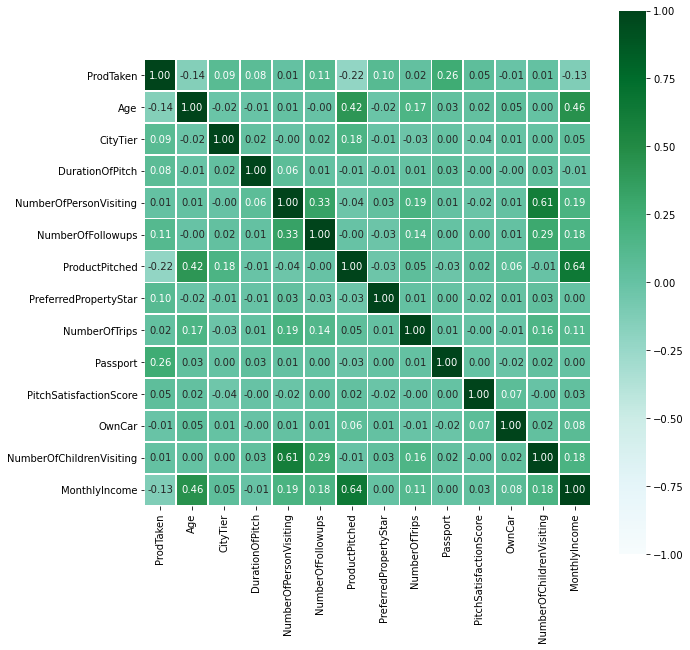

In [125]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),cmap='BuGn',annot=True, fmt=".2f", vmin=-1, vmax=1, center= 0, square=True, linewidths=.7)

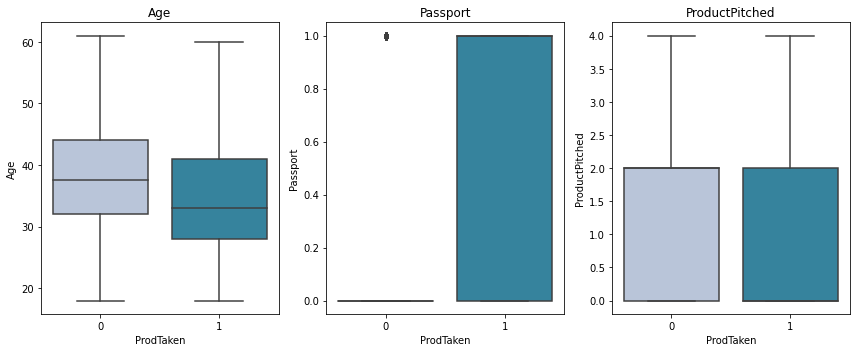

In [136]:
cols = data[['Age', 'Passport', 'ProductPitched']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['ProdTaken'],data[variable],palette="PuBuGn")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

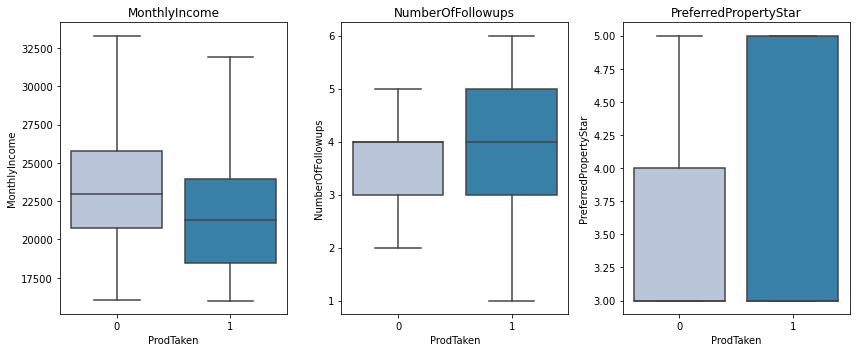

In [131]:
cols = data[[ 'MonthlyIncome', 'NumberOfFollowups', 'PreferredPropertyStar']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['ProdTaken'],data[variable],palette="PuBu", showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [35]:
replace_dict = {"ProductPitched": {"Basic": 0, "Standard":1, "Deluxe": 2, "Super Deluxe":3, "King":4}}
data=data.replace(replace_dict)

In [139]:
data.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.144572,0.087184,0.076438,0.008915,0.111813,-0.216685,0.098548,0.016980,0.261027,0.051952,-0.012020,0.007920,-0.128329
Age,-0.144572,1.000000,-0.016546,-0.011309,0.008450,-0.004033,0.417638,-0.017908,0.171557,0.029981,0.017343,0.047625,0.000443,0.457464
CityTier,0.087184,-0.016546,1.000000,0.022078,-0.002017,0.021707,0.179114,-0.010499,-0.028335,0.001749,-0.041260,0.005196,0.000421,0.050779
DurationOfPitch,0.076438,-0.011309,0.022078,1.000000,0.063484,0.010445,-0.013087,-0.005937,0.010314,0.032279,-0.002816,-0.001590,0.030541,-0.006004
NumberOfPersonVisiting,0.008915,0.008450,-0.002017,0.063484,1.000000,0.330185,-0.036192,0.030504,0.189400,0.008551,-0.019195,0.010181,0.606655,0.189798
NumberOfFollowups,0.111813,-0.004033,0.021707,0.010445,0.330185,1.000000,-0.003247,-0.029291,0.138100,0.004882,0.002942,0.010209,0.285966,0.177480
ProductPitched,-0.216685,0.417638,0.179114,-0.013087,-0.036192,-0.003247,1.000000,-0.031428,0.051170,-0.026323,0.021194,0.062519,-0.005231,0.643048
PreferredPropertyStar,0.098548,-0.017908,-0.010499,-0.005937,0.030504,-0.029291,-0.031428,1.000000,0.009914,0.000654,-0.022843,0.013093,0.032006,0.000822
NumberOfTrips,0.016980,0.171557,-0.028335,0.010314,0.189400,0.138100,0.051170,0.009914,1.000000,0.012412,-0.003925,-0.012832,0.160982,0.111509
Passport,0.261027,0.029981,0.001749,0.032279,0.008551,0.004882,-0.026323,0.000654,0.012412,1.000000,0.002262,-0.022825,0.018051,0.002490


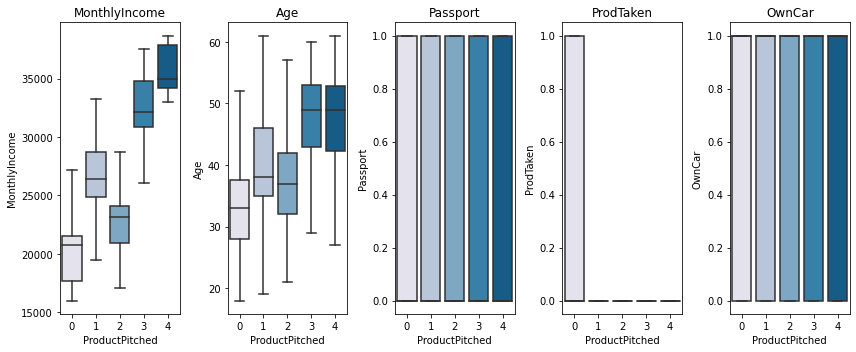

In [145]:
cols = data[[ 'MonthlyIncome', 'Age', 'Passport', 'ProdTaken', 'OwnCar']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,5,i+1)
                     sns.boxplot(data['ProductPitched'],data[variable],palette="PuBu", showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### Insights from bivariate analysis
- Product Taken correlates the highest with Passport (r = 0.26) and moderately correlates with age and income
- Number of People Visiting correlates highly with Number of Children visiting (r = 0.61)
- Number of people taking the product increases as monthly income decreases
- as the number of followups increase, so does the number of people that the that took the product
- more people took a lower package 
- people that had passports took the product more


- more deluxe packages were offered people for a higher monthly income and older in age:
    - basic packages were offered to customers between late 20s-late 30s with a monthly income between 15500-21000
    - standard packages were given to customers between late 30s and mid 40s with a monthly income between 25000-30000
    - deluxe packges were given to customers between mid 30s-mid 40s with a monthly income between 20000-25000
    - super deluxe packages were given to people between early 40s-mid 50s with a monthly income between 30000-35000
    - King packages were goven to people between mid 40s-mid 50s with a monthly income between 34500-3750 

#### One Hot Encoding 
- lets look at relationships between categorical data


In [36]:


data_2 = pd.get_dummies(data, columns=["TypeofContact", "Occupation", "Gender", 
                                       "MaritalStatus", "Designation"], drop_first=True)

In [37]:
data_2

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,...,Occupation_Salaried,Occupation_Small Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.000000,3,6.0,3,3.0,2,3.0,1.0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,49.000000,1,14.0,3,4.0,2,4.0,2.0,0,...,1,0,1,0,0,0,0,1,0,0
2,1,37.000000,1,8.0,3,4.0,0,3.0,7.0,1,...,0,0,1,0,1,0,1,0,0,0
3,0,33.000000,1,9.0,2,3.0,0,3.0,2.0,1,...,1,0,0,0,0,0,1,0,0,0
4,0,37.622265,1,8.0,2,3.0,0,4.0,1.0,0,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,3,9.0,3,5.0,2,4.0,2.0,1,...,0,1,1,0,0,1,0,1,0,0
4884,1,28.000000,1,31.0,4,5.0,0,3.0,3.0,1,...,1,0,1,0,1,0,1,0,0,0
4885,1,52.000000,3,17.0,4,4.0,1,4.0,7.0,0,...,1,0,0,1,0,0,0,0,1,0
4886,1,19.000000,3,16.0,3,4.0,0,3.0,3.0,0,...,0,1,1,0,1,0,1,0,0,0


In [38]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4887
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ProdTaken                   4863 non-null   int64  
 1   Age                         4863 non-null   float64
 2   CityTier                    4863 non-null   int64  
 3   DurationOfPitch             4863 non-null   float64
 4   NumberOfPersonVisiting      4863 non-null   int64  
 5   NumberOfFollowups           4863 non-null   float64
 6   ProductPitched              4863 non-null   int64  
 7   PreferredPropertyStar       4863 non-null   float64
 8   NumberOfTrips               4863 non-null   float64
 9   Passport                    4863 non-null   int64  
 10  PitchSatisfactionScore      4863 non-null   int64  
 11  OwnCar                      4863 non-null   int64  
 12  NumberOfChildrenVisiting    4863 non-null   float64
 13  MonthlyIncome               4863 

#### Insights from OneHotEncoding
- there are now 26 columns 

### Split the data

In [39]:
X = data_2.drop("ProdTaken", axis=1)
y = data["ProdTaken"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=3,stratify=y)

In [41]:
# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV

def scores(model, X_train, y_train, X_test, y_test, flag = True):
    
    score_list = []
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = accuracy_score(pred_train,y_train)
    test_acc = accuracy_score(pred_test,y_test)

    train_recall = recall_score(y_train,pred_train)
    test_recall = recall_score(y_test,pred_test)

    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
    
    if flag ==True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,y_train))
        print("Accuracy on test set : ",accuracy_score(pred_test,y_test), "\n")
        print("Recall on training set : ",recall_score(y_train,pred_train))
        print("Recall on test set : ",recall_score(y_test,pred_test), "\n")
        print("Precision on training set : ",precision_score(y_train,pred_train))
        print("Precision on test set : ",precision_score(y_test,pred_test))
    return score_list

In [42]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bagging Classifier

In [43]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=3)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=3)

In [44]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=scores(bagging_estimator, X_train, y_train, X_test, y_test )

Accuracy on training set :  0.9944183313748531
Accuracy on test set :  0.9054146675805346 

Recall on training set :  0.9735202492211839
Recall on test set :  0.6036363636363636 

Precision on training set :  0.9968102073365231
Precision on test set :  0.8512820512820513


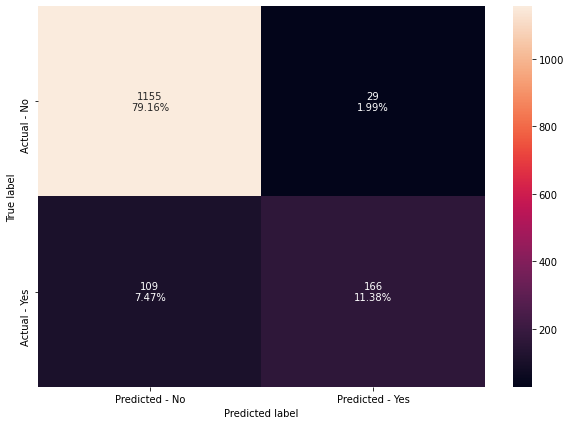

In [45]:
make_confusion_matrix(bagging_estimator,y_test)

#### Insights on first bagging 
- precision and accuracy look great 
- recall could be improved

In [46]:
#### Tuning the hyperparameters 

# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [47]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=scores(bagging_estimator_tuned, X_train, y_train, X_test, y_test)

Accuracy on training set :  0.9991186839012925
Accuracy on test set :  0.9184372858122002 

Recall on training set :  0.9953271028037384
Recall on test set :  0.6218181818181818 

Precision on training set :  1.0
Precision on test set :  0.9193548387096774


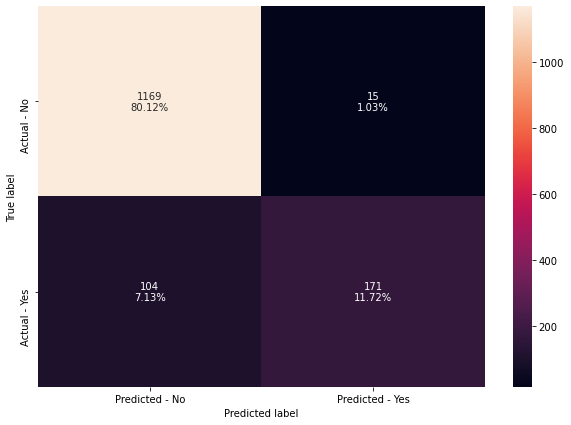

In [48]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

#### Insights on tuned hyperparameters 

- the training data has been overfit 
- recall has increased 
- precision and accuracy have decreased slightly 

In [147]:
#Fitting the model with a decision tree
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [156]:
#Calculating different metrics
dtree = scores(d_tree, X_train, y_train, X_test, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.8951336531871145 

Recall on training set :  1.0
Recall on test set :  0.6872727272727273 

Precision on training set :  1.0
Precision on test set :  0.73828125


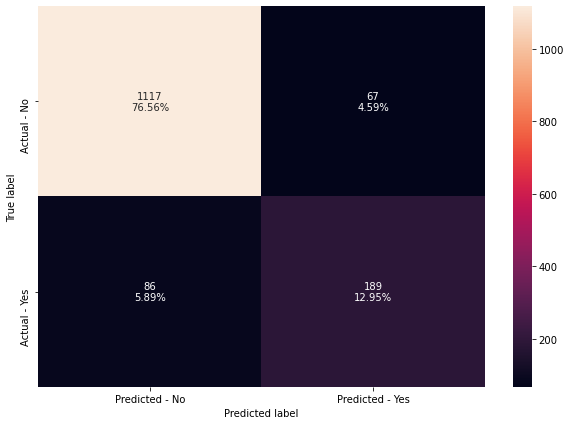

In [150]:
#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

#### Insights from decsion tree
-the train model is overfit, the hyperparameters need to tbe tuned

In [152]:
#Tune the decision tree
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

In [154]:
dtree_tuned = scores(dtree_estimator, X_train, y_train, X_test, y_test)

Accuracy on training set :  0.7441245593419507
Accuracy on test set :  0.6997943797121315 

Recall on training set :  0.764797507788162
Recall on test set :  0.7054545454545454 

Precision on training set :  0.40545004128819156
Precision on test set :  0.35208711433756806


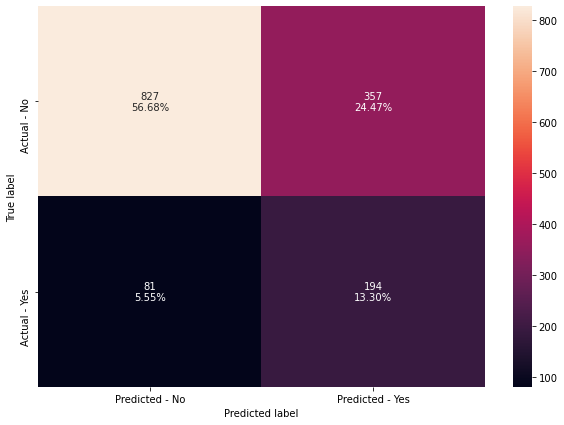

In [155]:
make_confusion_matrix(dtree_estimator,y_test)

#### Insights on tuned decision tree
- there is less overfitting on train data compared to test data
- compared to the default decsion tree, all 3 metrics have decreased

In [49]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [157]:
# accuracy, recall and precision on train and test set
rf_estimator_score=scores(rf_estimator, X_train, y_train, X_test, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.9136394790952708 

Recall on training set :  1.0
Recall on test set :  0.5709090909090909 

Precision on training set :  1.0
Precision on test set :  0.9515151515151515


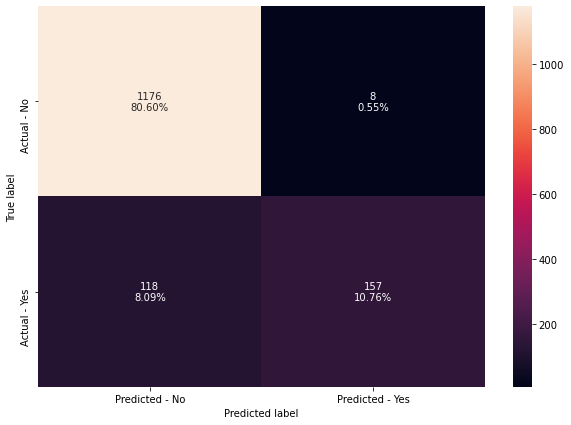

In [51]:
make_confusion_matrix(rf_estimator,y_test)

### Insights from random forest classifier 
- it looks like the random forest overfit the training data 
- the bagging estimator performed better on precision and recall

In [52]:
# Tuning the random forest
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=250, random_state=1)

In [53]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=scores(rf_estimator_tuned, X_train, y_train, X_test, y_test)

Accuracy on training set :  0.9174500587544065
Accuracy on test set :  0.8670322138450994 

Recall on training set :  0.5996884735202492
Recall on test set :  0.39636363636363636 

Precision on training set :  0.941320293398533
Precision on test set :  0.7956204379562044


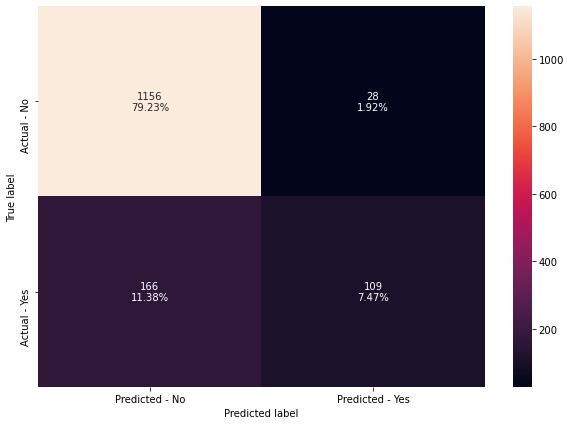

In [54]:
make_confusion_matrix(rf_estimator_tuned,y_test)

### Insights on tuned random forest
- overfitting has decreasedon train data
- recall has drastically decreased
- precision has decreased as well

### Using class weights on bagging 

In [55]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=9,
                       n_estimators=150, random_state=1)

In [56]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=scores(rf_estimator_weighted, X_train, y_train, X_test, y_test)

Accuracy on training set :  0.9021739130434783
Accuracy on test set :  0.858122001370802 

Recall on training set :  0.719626168224299
Recall on test set :  0.5490909090909091 

Precision on training set :  0.751219512195122
Precision on test set :  0.6452991452991453


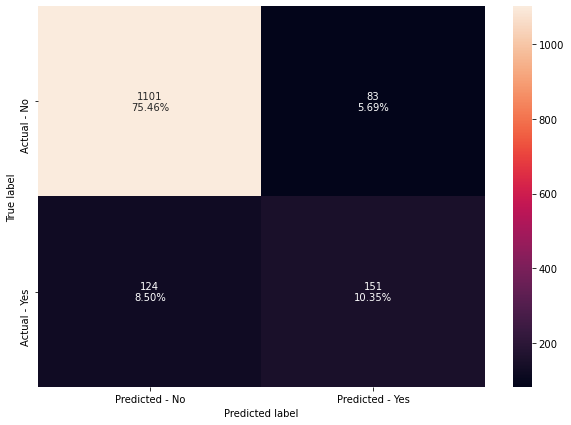

In [57]:
make_confusion_matrix(rf_estimator_weighted,y_test)

### Insights on class weights:
- The overfitting on the train data has decreased
- However, overall accuracy, precision, and recall have all decreased 

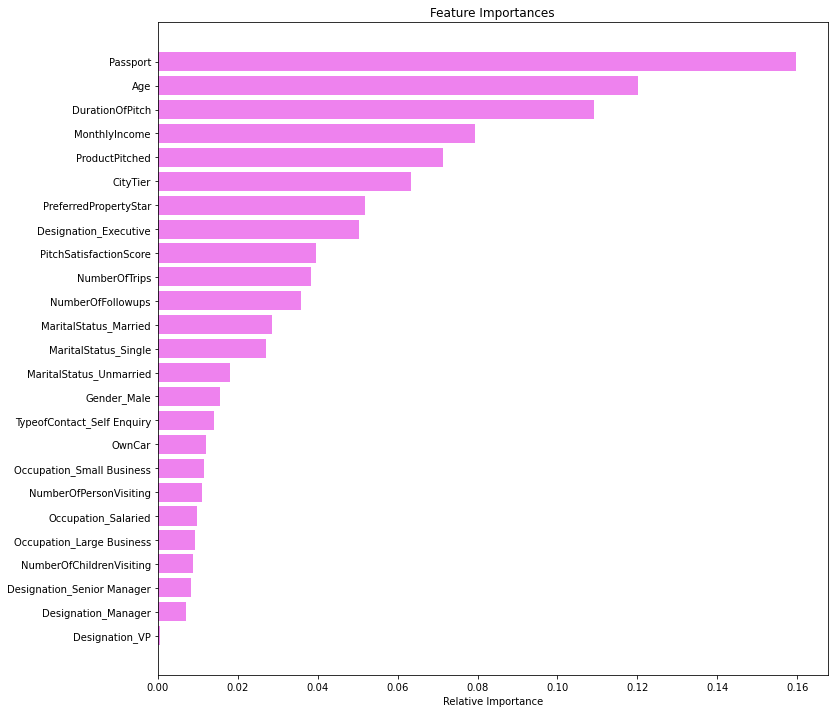

In [58]:
## Looking at feature importance

importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Insights on feature importance 

It seems that passport, age, and duration of pitch are the most important factors on whether the package was selected or not

In [120]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = scores(model,X_train, y_train, X_test, y_test, False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [121]:
comparison_frame = pd.DataFrame({'Model':['Default Bagging classifier ','Tuned Bagging Classifier',
                                     'Default Random Forest',
                                         'Tuned Random Forest Classifier','Random Forest with class weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Default Bagging classifier,0.99,0.91,0.97,0.60,1.00,0.85
1,Tuned Bagging Classifier,1.00,0.92,1.00,0.62,1.00,0.92
2,Default Random Forest,1.00,0.91,1.00,0.57,1.00,0.95
3,Tuned Random Forest Classifier,0.92,0.87,0.60,0.40,0.94,0.80
4,Random Forest with class weights,0.90,0.86,0.72,0.55,0.75,0.65


### Insights from bagging 
- the best accuracy came from the default bagging classifier wand the default random forest
- the best recall came from the tuned bagging classifier 
- the best precision came from the default random forest 
- the best model, which was not overfit, was the tuned random forest overall

### Boosting 

In [61]:
### Adaboost model 

abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [62]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=scores(abc,X_train, y_train, X_test, y_test )

Accuracy on training set :  0.8460634547591069
Accuracy on test set :  0.8327621658670322 

Recall on training set :  0.3598130841121495
Recall on test set :  0.34545454545454546 

Precision on training set :  0.6715116279069767
Precision on test set :  0.5974842767295597


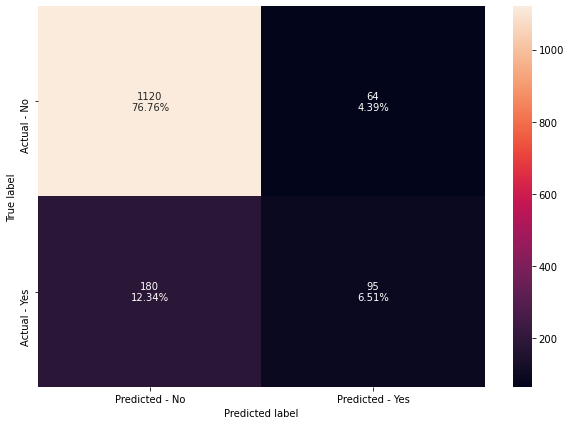

In [63]:
make_confusion_matrix(abc,y_test)

#### Insights from Adaboost
- recall and precision are very poor
- accuracy is ok 

In [64]:
### Gradient Boost 

gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [65]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=scores(gbc,X_train, y_train, X_test, y_test)

Accuracy on training set :  0.8851351351351351
Accuracy on test set :  0.8670322138450994 

Recall on training set :  0.48286604361370716
Recall on test set :  0.4218181818181818 

Precision on training set :  0.8401084010840109
Precision on test set :  0.7682119205298014


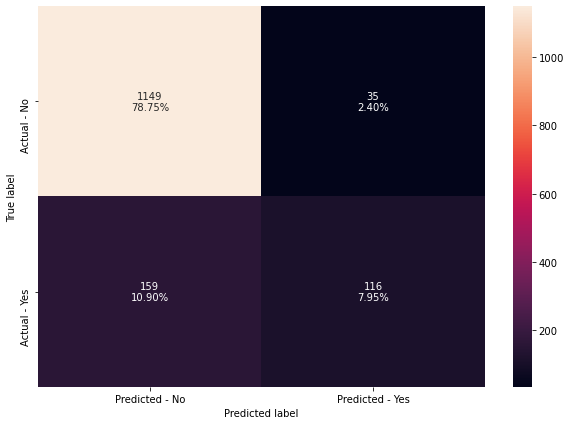

In [66]:
make_confusion_matrix(gbc,y_test)

#### Insights from gradient boost
- all 3 metrics have improved 

In [67]:
##XG Boost 

xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[15:27:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=scores(xgb,X_train, y_train, X_test, y_test )

Accuracy on training set :  1.0
Accuracy on test set :  0.9252912954078135 

Recall on training set :  1.0
Recall on test set :  0.6763636363636364 

Precision on training set :  1.0
Precision on test set :  0.9029126213592233


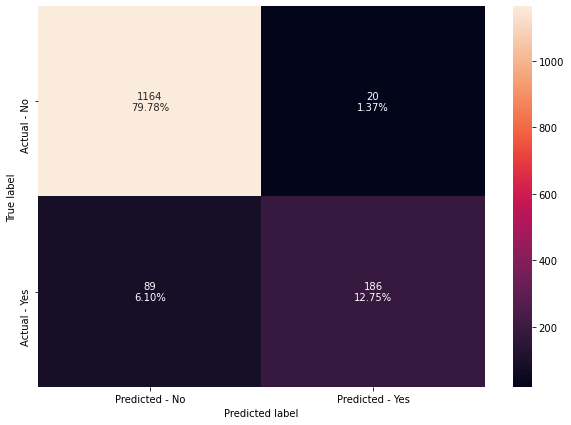

In [69]:
make_confusion_matrix(xgb,y_test)

### Insights from xgboost
- we have an overfit on the all 3 metrics on the training data 


In [70]:
### Hyperparameter tuning on adaboost

# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=80, random_state=1)

In [71]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=scores(abc_tuned,X_train, y_train, X_test, y_test )

Accuracy on training set :  0.9791421856639247
Accuracy on test set :  0.8786840301576422 

Recall on training set :  0.9205607476635514
Recall on test set :  0.5818181818181818 

Precision on training set :  0.967266775777414
Precision on test set :  0.7207207207207207


In [72]:
abc_score

[0.8460634547591069,
 0.8327621658670322,
 0.3598130841121495,
 0.34545454545454546,
 0.6715116279069767,
 0.5974842767295597]

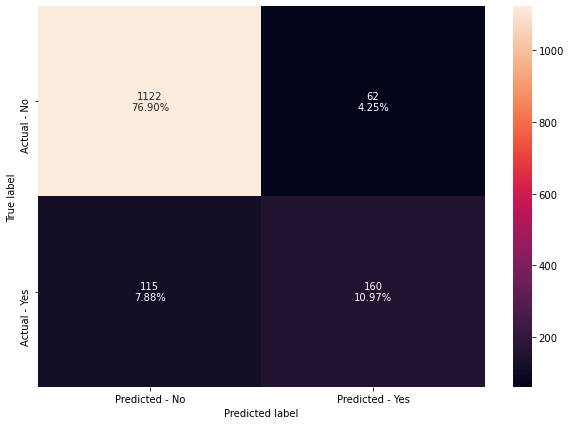

In [73]:
make_confusion_matrix(abc_tuned,y_test)

#### Insights on tuned adaboost
- accuracy, recall, and precision have all increased when compared to default adaboost

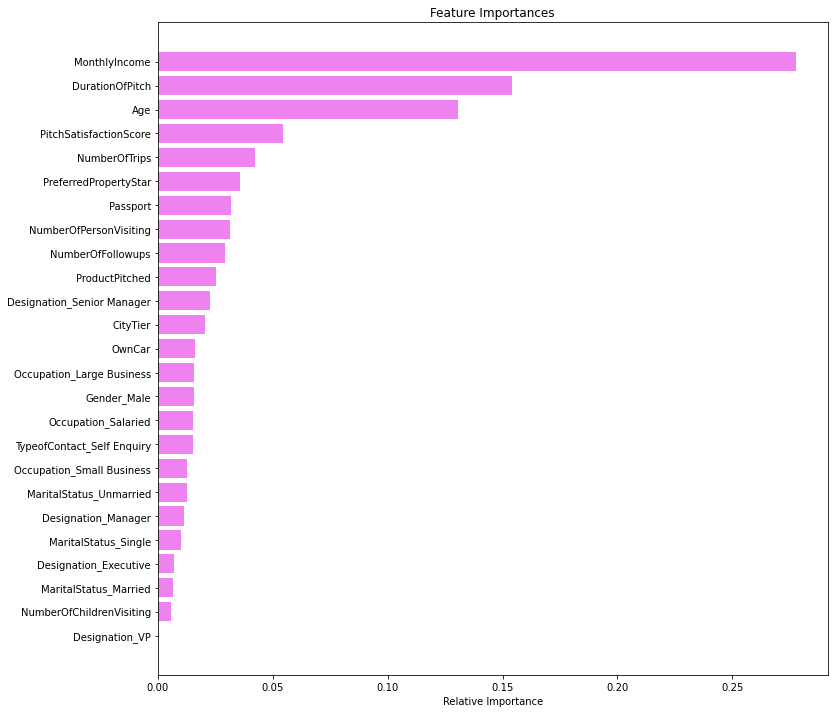

In [74]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### insights on tuned adaboost feature importances
- monthly income has now become the most important feature 
- duration of pitch is the second most important feature 
- age is the thrid most important feauture 

In [75]:
### Gradient boosting using adaboost 

gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [76]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=scores(gbc_init,X_train, y_train, X_test, y_test )

Accuracy on training set :  0.8842538190364277
Accuracy on test set :  0.8684030157642221 

Recall on training set :  0.470404984423676
Recall on test set :  0.4218181818181818 

Precision on training set :  0.848314606741573
Precision on test set :  0.7785234899328859


In [77]:
gbc_score

[0.8851351351351351,
 0.8670322138450994,
 0.48286604361370716,
 0.4218181818181818,
 0.8401084010840109,
 0.7682119205298014]

In [78]:
### there was a slight increase, we can try AdaBoostClassifier() to tune the gradient boosting model

# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

In [79]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=scores(gbc_tuned, X_train, y_train, X_test, y_test )

Accuracy on training set :  0.9259694477085781
Accuracy on test set :  0.8834818368745716 

Recall on training set :  0.661993769470405
Recall on test set :  0.5236363636363637 

Precision on training set :  0.9239130434782609
Precision on test set :  0.7868852459016393


In [158]:
###default gradient boost metrics

gbc_score 

[0.8851351351351351,
 0.8670322138450994,
 0.48286604361370716,
 0.4218181818181818,
 0.8401084010840109,
 0.7682119205298014]

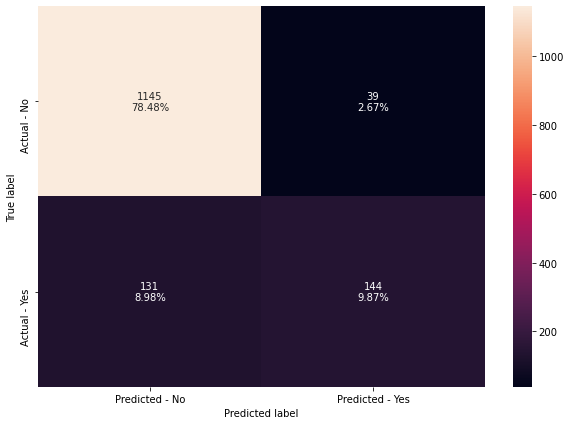

In [81]:
make_confusion_matrix(gbc_tuned,y_test)

#### Insights from Gradient Boost tuning 
- all 3 metrics have improved from the default gradient boosting 
- all 3 metrics have improved from the second tuning with adaboost and hyperparameters

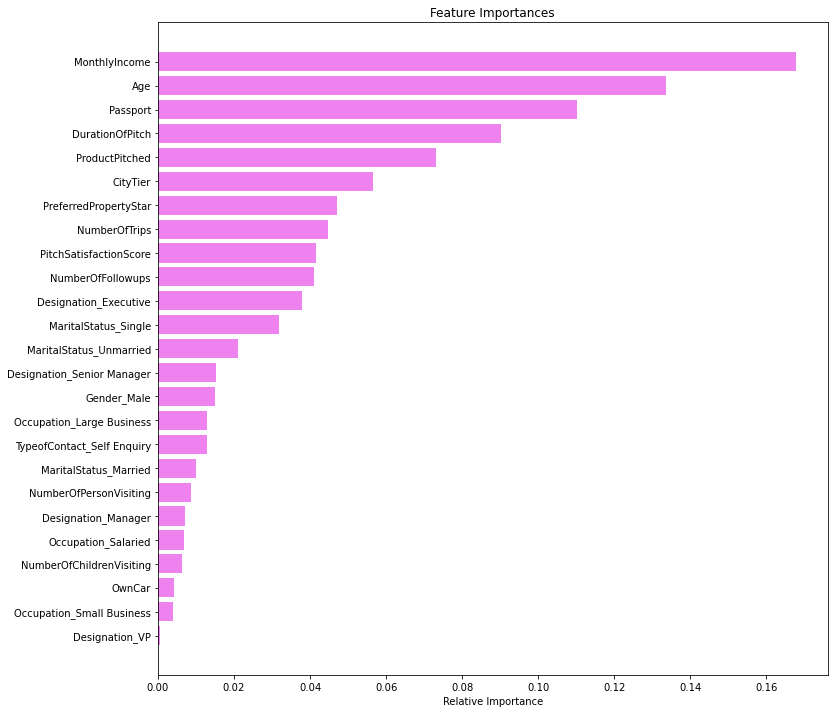

In [82]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Insights from hyperparameter tuning using adaboost on gradient boosting on feature importances 
- monthly income is the most important feauture 
- age is the second most important feature 
- passport is the 3rd most importnsnt feature

In [84]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [85]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=scores(xgb_tuned, X_train, y_train, X_test, y_test)

Accuracy on training set :  0.9791421856639247
Accuracy on test set :  0.8923920493488691 

Recall on training set :  0.9922118380062306
Recall on test set :  0.7527272727272727 

Precision on training set :  0.9061166429587483
Precision on test set :  0.6993243243243243


In [159]:
### default xbg 
xgb_score

[1.0, 0.9252912954078135, 1.0, 0.6763636363636364, 1.0, 0.9029126213592233]

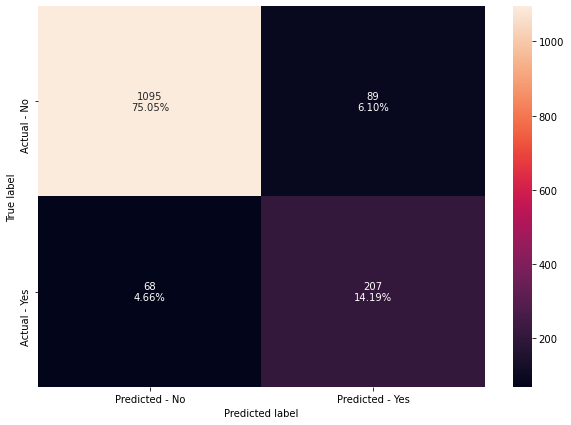

In [86]:
make_confusion_matrix(xgb_tuned,y_test)

#### Insights on tuned XG Boost 
- the overfitting on the train data has decresaed
- however, all of the test data metrics have decreased

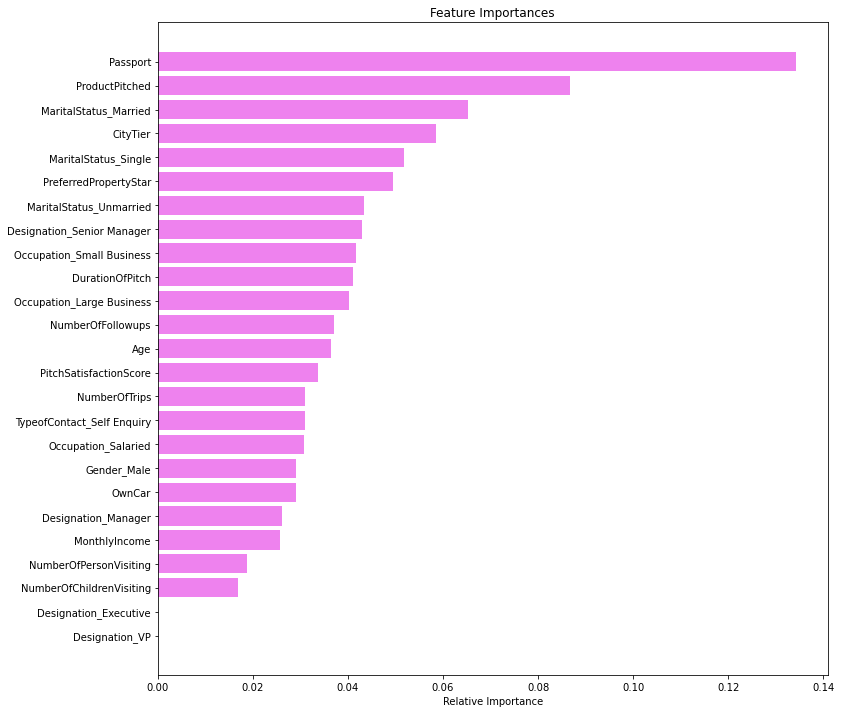

In [90]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Insights on hyperparameters from tuned xg boost
- the most important feature is passport
- the next most important features are product pitched and a marreid maritial status


In [95]:
### Stacking Classifier 

estimators = [('Random Forest',rf_estimator_tuned), ('Gradient Boosting',gbc_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=250,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.8))],
                   final_estim...
                                                 eval_metric='

In [99]:
stacked_score = scores(stacking_classifier, X_train, y_train, X_test, y_test)

Accuracy on training set :  0.8901292596944771
Accuracy on test set :  0.8122001370801919 

Recall on training set :  0.9345794392523364
Recall on test set :  0.76 

Precision on training set :  0.6437768240343348
Precision on test set :  0.5011990407673861


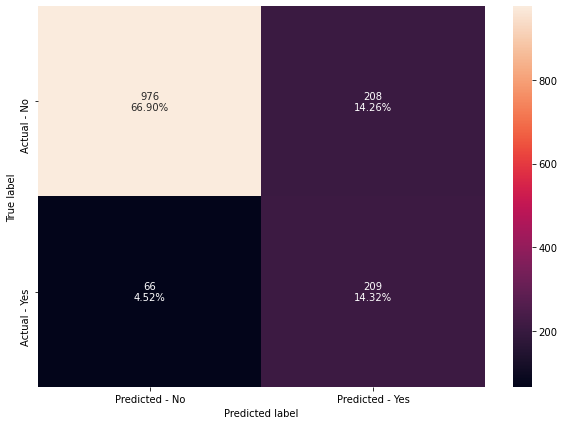

In [110]:
make_confusion_matrix(stacking_classifier,y_test)

#### Insights on stacking classifier
- there is no overfit of the train data 
- there is slightly better recall than the tuned xg boost
- precision and accuracy have slightly decreased from the tuned xg boost

In [112]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = scores(model,X_train, y_train, X_test, y_test,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [118]:
comparison_frame2 = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame2

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.85,0.83,0.36,0.35,0.67,0.60
1,AdaBoost Tuned,0.98,0.88,0.92,0.58,0.97,0.72
2,Gradient Boosting with default parameters,0.89,0.87,0.48,0.42,0.84,0.77
3,Gradient Boosting with init=AdaBoost,0.88,0.87,0.47,0.42,0.85,0.78
4,Gradient Boosting Tuned,0.93,0.88,0.66,0.52,0.92,0.79
5,XGBoost with default parameters,1.00,0.93,1.00,0.68,1.00,0.90
6,XGBoost Tuned,0.98,0.89,0.99,0.75,0.91,0.70


#### Takeaways from boosting overall
- the best model in the boosting class for accuracy is tuned XGBoost 
- the best model for recall was the tuned xgboost
- the best model for precision is the default XG boost

- overall the best model is the tuned xgboost

In [122]:
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Default Bagging classifier,0.99,0.91,0.97,0.60,1.00,0.85
1,Tuned Bagging Classifier,1.00,0.92,1.00,0.62,1.00,0.92
2,Default Random Forest,1.00,0.91,1.00,0.57,1.00,0.95
3,Tuned Random Forest Classifier,0.92,0.87,0.60,0.40,0.94,0.80
4,Random Forest with class weights,0.90,0.86,0.72,0.55,0.75,0.65


### bagging vs boosting 
- between bagging and boosting, the best model for accuracy was the tuned xg boost without overfitting the train data 
- the best model for recall was the tuned xgboost
- the best model for precision was gradient boosting with initializer of adaboost

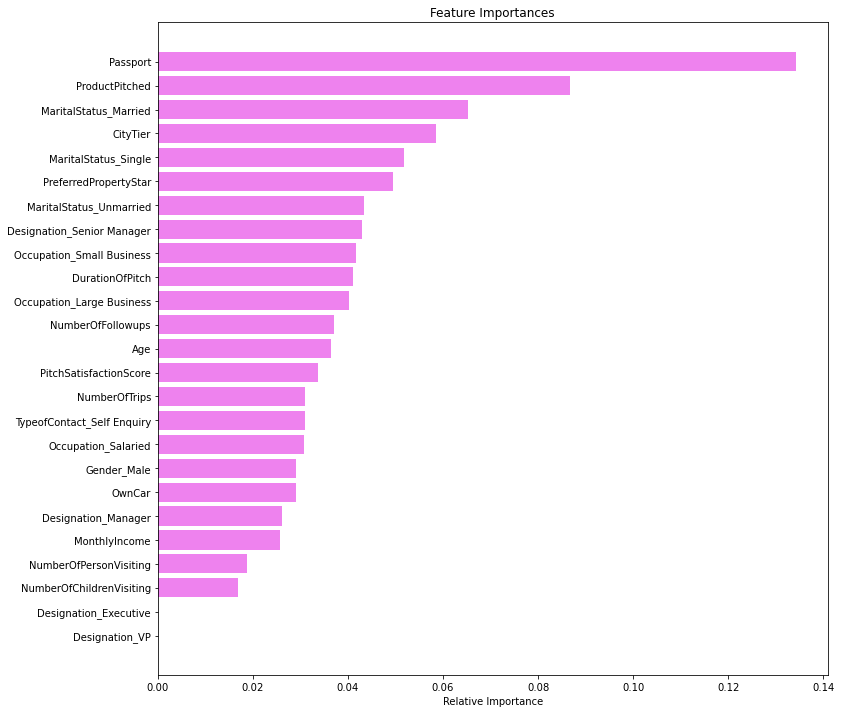

In [123]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Insights on tuned hyperparameters in random forest 

- age is the most important feature in this model 
- duration of pitch and passport are the second most important feature 

## Conclusions
- The person that has the highest likelihood of accepting a travel package:
    - has a passport
    - was pitched a lesser premium product
    - was married 
    - lived in a city 
    - had a longer pitch duration 
    - was of a younger age
    - had a lower monthly income
 
 
- Of all of the important features, the ones to target the most are: people who have a passport, pitched a less premium product, and married. 
 - I would recommend targeting people that were married, have a passport, and pitching a smaller product in order to maximize the acceptance of the new travel package